In [1]:
import pandas as pd
from  matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap
from matplotlib_venn import venn3

In [2]:
# Comparison of ranking with Venn diagram, Spearman, Overlap genes and Non-overlap genes
# In different alpha values

alphas = [0,0.2,0.5,0.65,0.8,0.9,1]
alphas2 = [0,0.65,1]
rankings = {}
rankings_aggr = {}
rankings_non_aggr = {}
rankings_nw8 = {}
rankings_nw8_aggr = {}
rankings_nw8_non_aggr = {}

In [3]:
# Use sorted ranking files of the output folder

for alpha in alphas:
    df = pd.read_csv('alpha_'+str(alpha)+'_corrected.desc',header = None)
    df = df[df.index<100]
    ranking = df[0].tolist()
    rankings[alpha] = ranking   
for alpha in alphas:
    df = pd.read_csv('alpha_'+str(alpha)+'_corrected_aggr.desc',header = None)
    df = df[df.index<100]
    ranking = df[0].tolist()
    rankings_aggr[alpha] = ranking   
for alpha in alphas:
    df = pd.read_csv('alpha_'+str(alpha)+'_corrected_non_aggr.desc',header = None)
    df = df[df.index<100]
    ranking = df[0].tolist()
    rankings_non_aggr[alpha] = ranking    
for alpha in alphas2:
    df = pd.read_csv('network8_alpha_'+str(alpha)+'_corrected.desc',header = None)
    df = df[df.index<100]
    ranking = df[0].tolist()
    rankings_nw8[alpha] = ranking  
for alpha in alphas2:
    df = pd.read_csv('network8_alpha_'+str(alpha)+'_corrected_aggr.desc',header = None)
    df = df[df.index<100]
    ranking = df[0].tolist()
    rankings_nw8_aggr[alpha] = ranking  
for alpha in alphas2:
    df = pd.read_csv('network8_alpha_'+str(alpha)+'_corrected_non_aggr.desc',header = None)
    df = df[df.index<100]
    ranking = df[0].tolist()
    rankings_nw8_non_aggr[alpha] = ranking  

In [48]:
def plot_Venn_diagram(ranking1,ranking2,ranking3,alpha1,alpha2,alpha3,cancer_type,network_nr):
    name = 'network_'+str(network_nr)+'_'+cancer_type + '_' + str(alpha1) + '-' + str(alpha2) + '-' + str(alpha3)
    set1 = set(ranking1)
    set2 = set(ranking2)
    set3 = set(ranking3)
    v=venn3([set1, set2, set3], ('\u03B1 = '+str(alpha1), '\u03B1 = '+str(alpha2), '\u03B1 = '+str(alpha3)))
    plt.title('Venn diagram of the \u03B1 = '+str(alpha1)+', \u03B1 = '+str(alpha2)+' and \u03B1 = '+str(alpha3)+' top ranked genes \n in '+ cancer_type + ' prostate cancers and network '+str(network_nr),size=12)
    plt.savefig('Venn_diagram_'+name+'.png',bbox_inches="tight")
    plt.show()

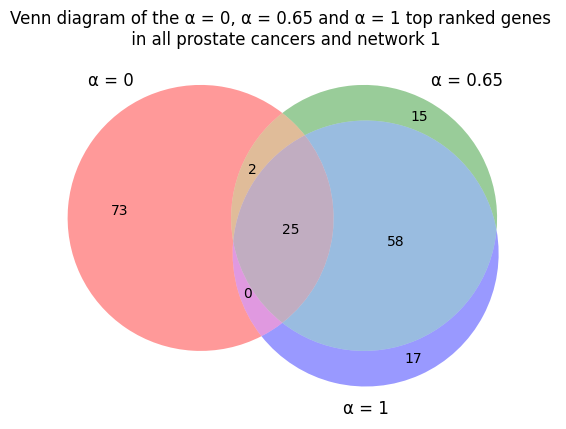

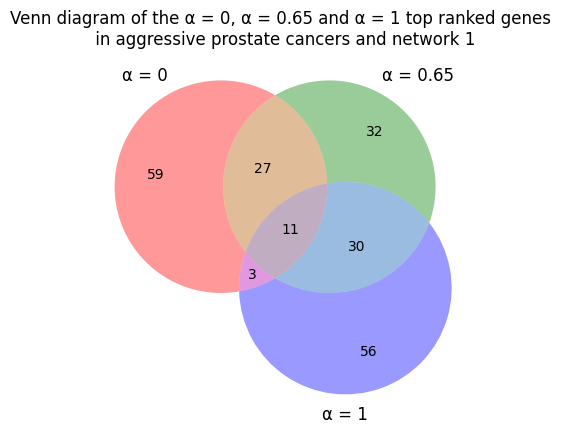

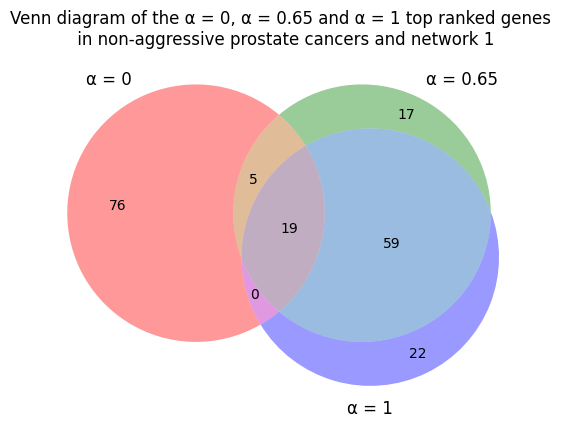

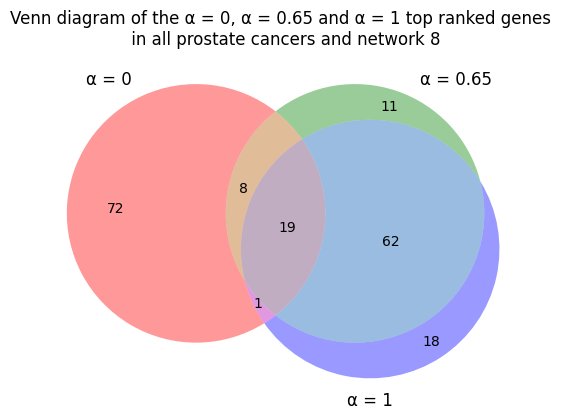

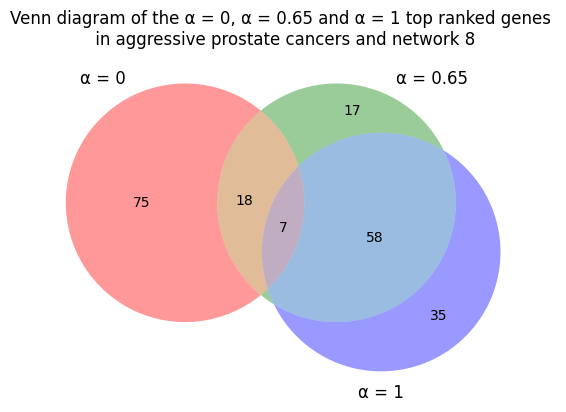

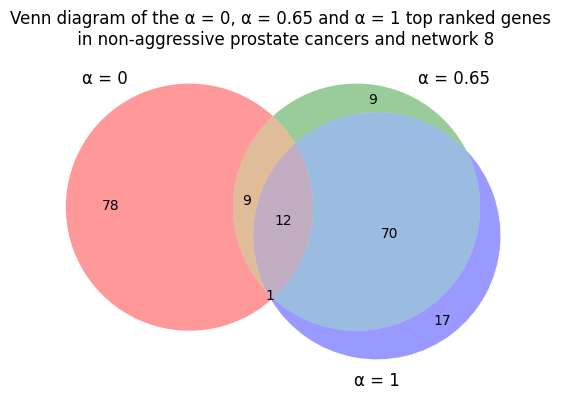

In [49]:
plot_Venn_diagram(rankings[0],rankings[0.65],rankings[1],0,0.65,1,'all',1)
plot_Venn_diagram(rankings_aggr[0],rankings_aggr[0.65],rankings_aggr[1],0,0.65,1,'aggressive',1)
plot_Venn_diagram(rankings_non_aggr[0],rankings_non_aggr[0.65],rankings_non_aggr[1],0,0.65,1,'non-aggressive',1)
plot_Venn_diagram(rankings_nw8[0],rankings_nw8[0.65],rankings_nw8[1],0,0.65,1,'all',8)
plot_Venn_diagram(rankings_nw8_aggr[0],rankings_nw8_aggr[0.65],rankings_nw8_aggr[1],0,0.65,1,'aggressive',8)
plot_Venn_diagram(rankings_nw8_non_aggr[0],rankings_nw8_non_aggr[0.65],rankings_nw8_non_aggr[1],0,0.65,1,'non-aggressive',8)

In [50]:
def remap_ranking(ranking):
    N = len(ranking)
    Max = max(ranking)
    ranking_indices = []
    for j in range(N):
        m = min(ranking)
        m_i = ranking.index(m)
        ranking_indices.append(m_i)
        ranking[m_i] = Max + 1
    ranking_new = np.zeros(N,dtype=int)
    for i in range(N):
        ranking_new[ranking_indices[i]]=i+1
    return ranking_new.tolist()

In [51]:
def calculate_rank_correlation(rankingA,rankingB):
    ranksA = []
    ranksB = []
    n = 0
    D = 0
    for g in rankingA:
        if g in rankingB:
            ranksA.append(rankingA.index(g)+1)
            ranksB.append(rankingB.index(g)+1)
            n = n+1
    ranksA = remap_ranking(ranksA)
    ranksB = remap_ranking(ranksB)
    for i in range(len(ranksA)):
        d = ranksA[i]-ranksB[i]
        D = D + pow(d,2)
    r = 1 - 6*D/(n*(pow(n,2)-1))
    return r    

In [54]:
def Spearman_plot(rankings,alphas,cancer_type,network_nr):
    name = 'network_'+str(network_nr)+'_'+cancer_type
    dat = {}
    ind = []
    for i in alphas:
        r = []
        for j in alphas:
            r.append(calculate_rank_correlation(rankings[i],rankings[j]))
        exec("dat['Alpha = %.2f']=%s" % (i,r))
        exec("ind.append('Alpha = %.2f')" % i)
    df_plot = pd.DataFrame(dat,ind)
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
    from  matplotlib.colors import LinearSegmentedColormap
    c = ["darkred","red","lightcoral","white","palegreen","green","darkgreen"]
    v = [0,.15,.4,0.5,0.6,.9,1.]
    l = list(zip(v,c))
    cmap=LinearSegmentedColormap.from_list('rg',l, N=256)
    hm = sns.heatmap(df_plot,ax=ax,square=True,cmap=cmap,annot=True,fmt='.2f',vmin=-1,vmax=1,cbar_kws={'label':'Spearman\'s rank correlation coefficient','shrink':0.5})
    hm.set_xticklabels(hm.get_xticklabels(),rotation=30,horizontalalignment='right')
    ax.set_title('Spearman\'s rank correlation coefficient of the overlapping \n ranked genes in the top 100 of runs with different alpha \n in '+ cancer_type + ' prostate cancers and network '+str(network_nr),pad=15)
    plt.savefig('Rank_correlation_coefficient_'+name+'.png',bbox_inches="tight")
    plt.show()

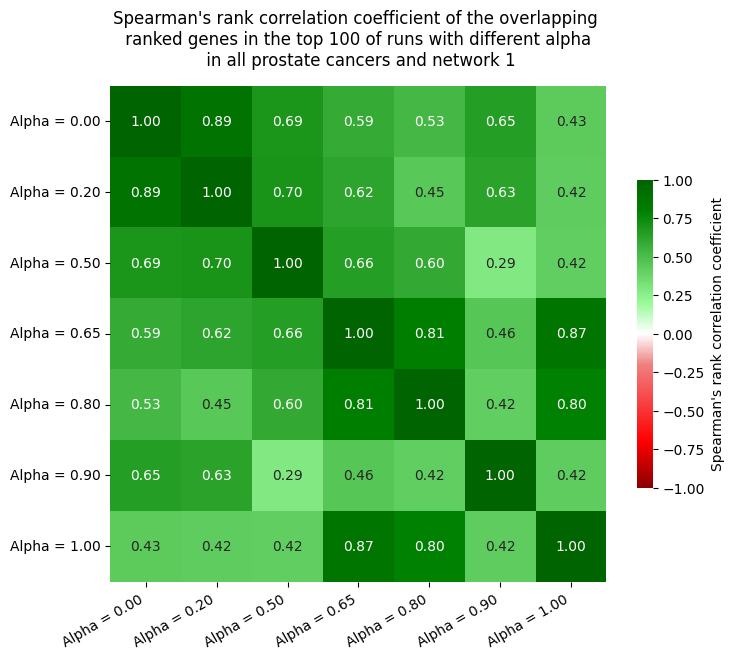

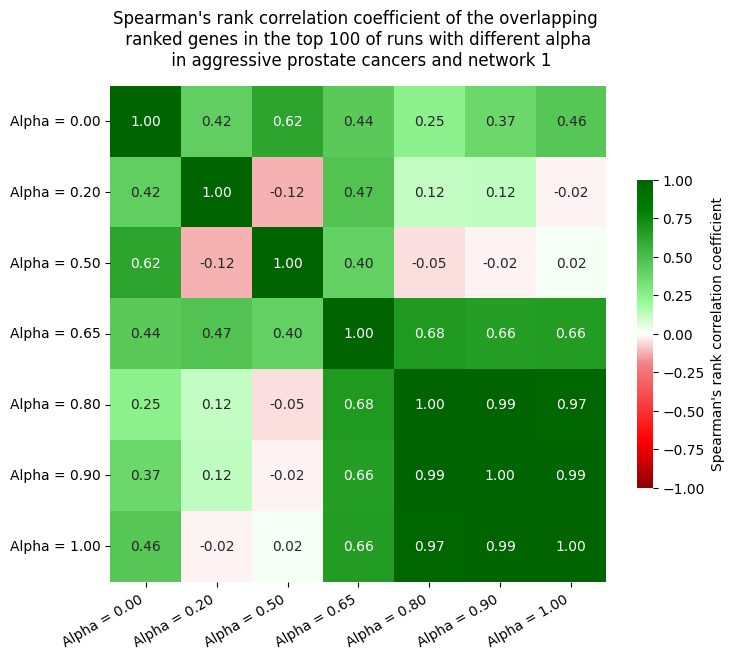

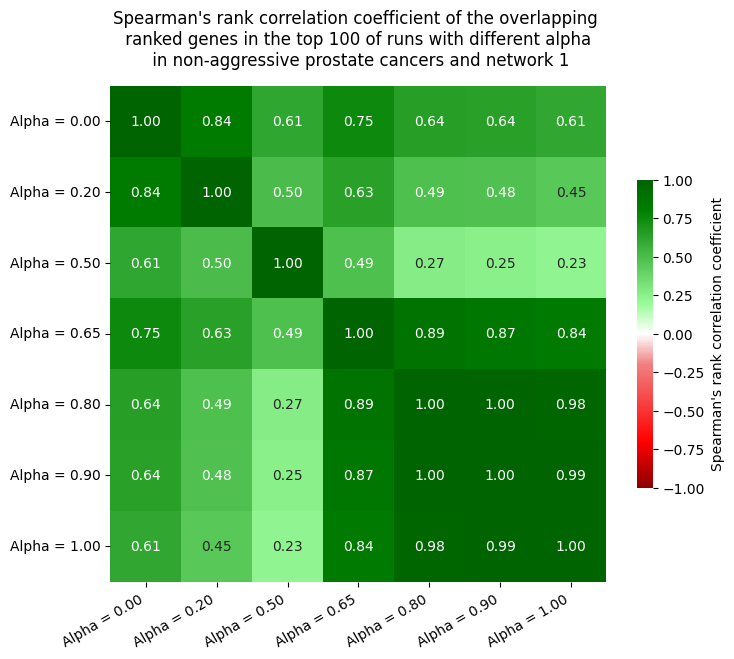

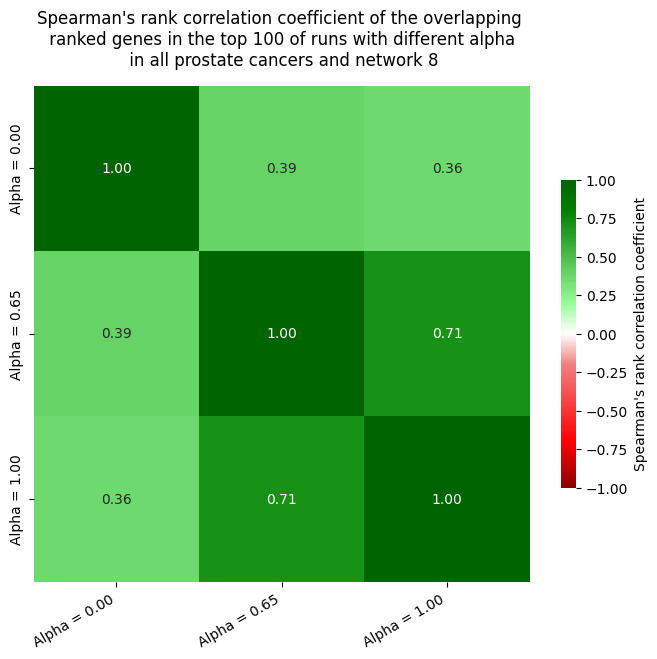

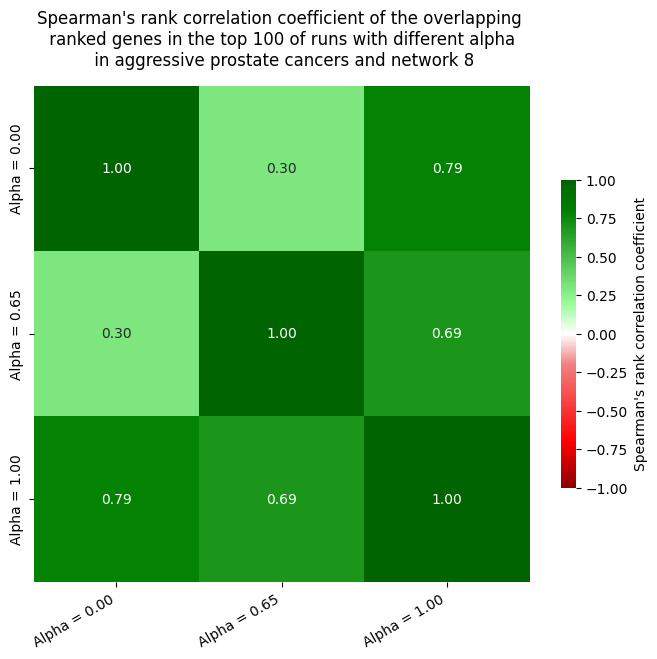

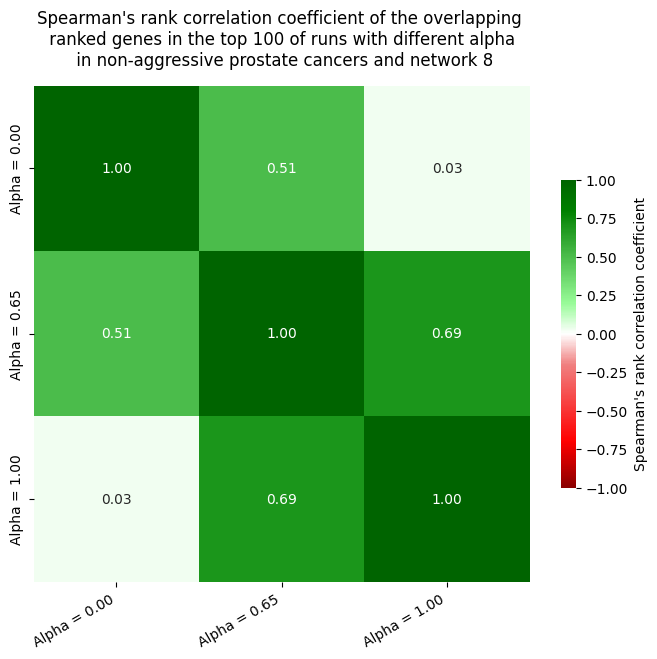

In [58]:
Spearman_plot(rankings,alphas,'all',1)
Spearman_plot(rankings_aggr,alphas,'aggressive',1)
Spearman_plot(rankings_non_aggr,alphas,'non-aggressive',1)
Spearman_plot(rankings_nw8,alphas2,'all',8)
Spearman_plot(rankings_nw8_aggr,alphas2,'aggressive',8)
Spearman_plot(rankings_nw8_non_aggr,alphas2,'non-aggressive',8)

In [14]:
def Overlap_plot(rankings,alphas,cancer_type,network_nr):
    name = 'network_'+str(network_nr)+'_'+cancer_type
    i = 0
    for alpha in alphas:
        exec("%s = []" % ('not_in_alpha_index_'+str(i))) #alpha_index 0 --> alpha = 0, alpha_index 1 --> alpha = 0.2, ...
        exec("%s = []" % ('not_in_alpha_index_count_'+str(i)))
        for r in rankings:
            genes = []
            for g in rankings[r]:
                if g not in rankings[alpha]:
                    genes.append(g)
            exec("%s.append(genes)" % ('not_in_alpha_index_'+str(i)))
            exec("%s.append(len(genes))" % ('not_in_alpha_index_count_'+str(i)))
        i=i+1

    data = {}
    index = []
    i = 0
    for alpha in alphas:
        exec("data['Alpha = %.2f']=%s" % (alpha,'not_in_alpha_index_count_'+str(i)))
        i=i+1  
        exec("index.append('Alpha = %.2f')" % (alpha))
    for d in data:
        data[d] = [100 - x for x in data.get(d)]
    index

    df_plot = pd.DataFrame(data, index)
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
    hm = sns.heatmap(df_plot,ax=ax,square=True,cmap='Blues',annot=True,fmt='g',cbar_kws={'label':'Number of overlapping genes','shrink':0.5})
    hm.set_xticklabels(hm.get_xticklabels(),rotation=30,horizontalalignment='right')
    ax.set_title('Overlap between the top 100 ranked genes of runs with different alpha \n in '+ cancer_type + ' prostate cancers and network '+str(network_nr),pad=15)
    plt.savefig('Overlap_rankings_alpha_'+name+'.png',bbox_inches="tight")
    plt.show()

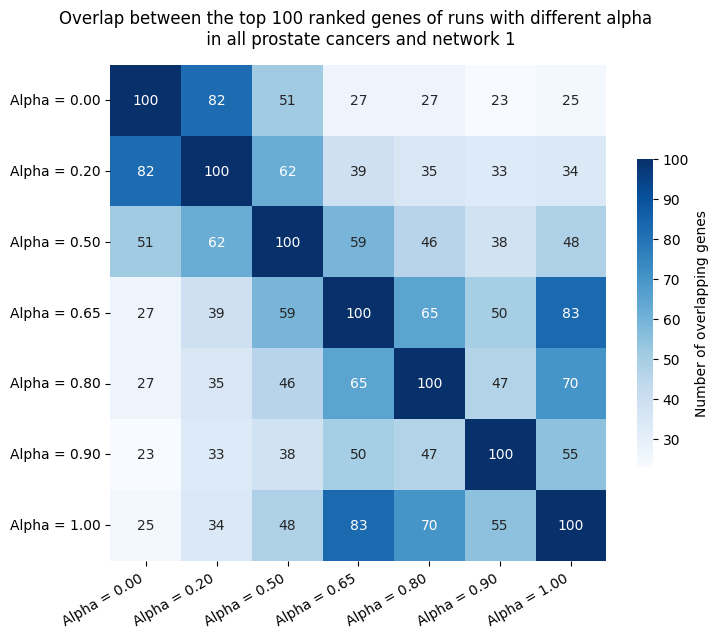

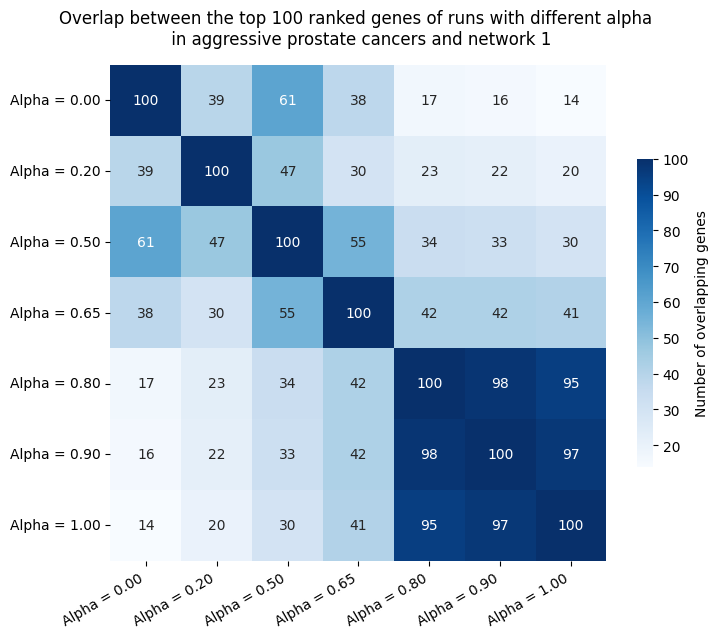

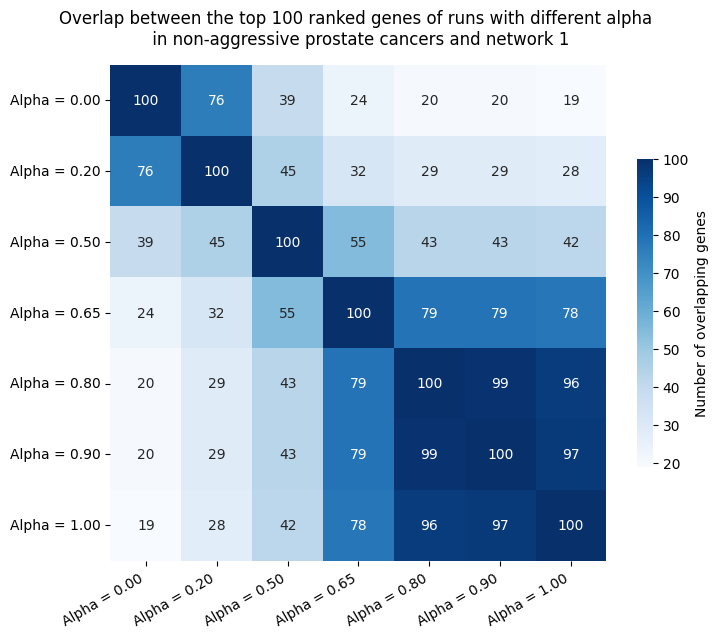

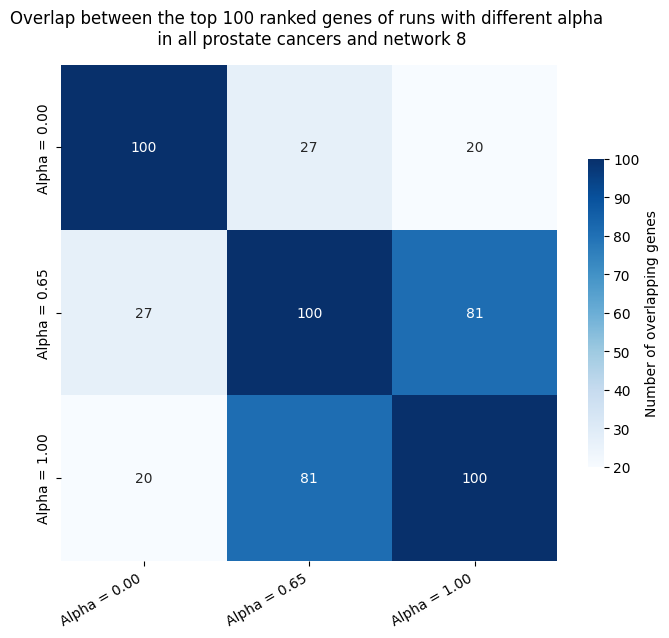

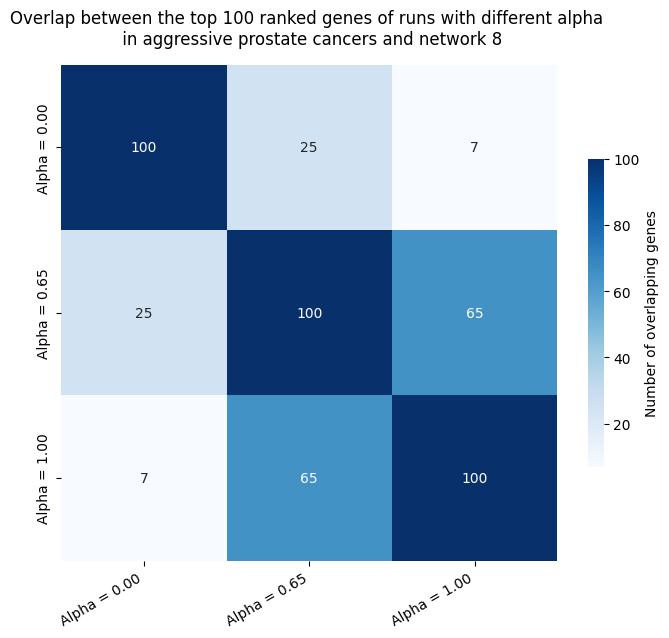

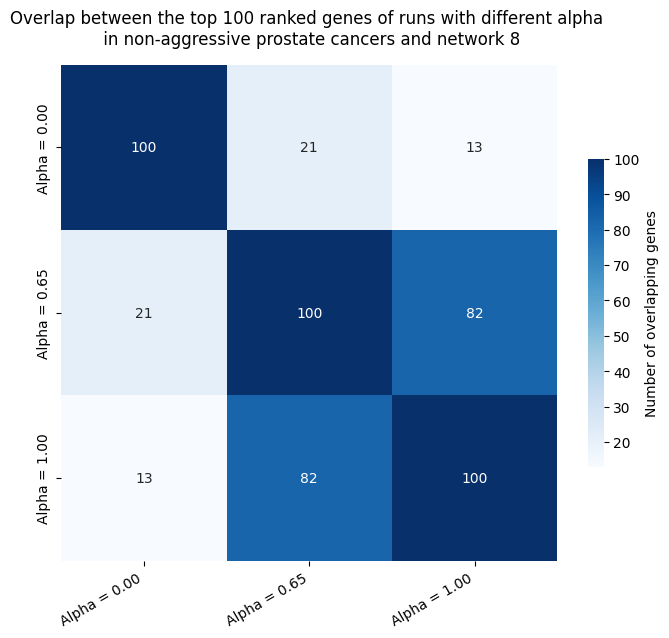

In [15]:
Overlap_plot(rankings,alphas,"all",1)
Overlap_plot(rankings_aggr,alphas,"aggressive",1)
Overlap_plot(rankings_non_aggr,alphas,"non-aggressive",1)
Overlap_plot(rankings_nw8,alphas2,"all",8)
Overlap_plot(rankings_nw8_aggr,alphas2,"aggressive",8)
Overlap_plot(rankings_nw8_non_aggr,alphas2,"non-aggressive",8)

In [21]:
def non_overlapping_high_ranked_genes_plot(rankings,alphas,cancer_type,network_nr,max_number_of_genes_you_show):
# Don't give extra rankings, if you don't use them
    name = 'network_'+str(network_nr)+'_'+cancer_type
    i = 0
    for alpha in alphas:
        exec("%s = []" % ('not_in_alpha_index_'+str(i))) #alpha_index 0 --> alpha = 0, alpha_index 1 --> alpha = 0.2, ...
        exec("%s = []" % ('not_in_alpha_index_count_'+str(i)))
        for r in rankings:
            genes = []
            for g in rankings[r]:
                if g not in rankings[alpha]:
                    genes.append(g)
            exec("%s.append(genes)" % ('not_in_alpha_index_'+str(i)))
            exec("%s.append(len(genes))" % ('not_in_alpha_index_count_'+str(i)))
        i=i+1
    
    data2 = {}
    text = np.zeros([len(alphas),len(alphas)],dtype=object)
    index2 = []
    data_empty = {}
    zeros = []
    for a in range(len(alphas)):
        zeros.append(0)

    i = 0
    for alpha in alphas:
        exec("data2['Not in alpha = %.2f']=%s" % (alpha,'not_in_alpha_index_'+str(i)))
        i=i+1  
        exec("index2.append('In alpha = %.2f')" % (alpha))
        exec("data_empty['Not in alpha = %.2f']=%s" % (alpha,zeros))
    j = 0
    for d2 in data2:
        for i in range(len(alphas)):
            text[j][i] = " ".join(data2[d2][i][0:max_number_of_genes_you_show])
        j = j+1

    for i1 in range(len(alphas)):
        for i2 in range(len(alphas)):
            s = text[i1,i2].split()
            k = len(s)
            m = 0
            text[i1,i2] = ''
            while k>0:
                text[i1,i2] = text[i1,i2] + s[m] +' ('+ str(rankings[alphas[i2]].index(s[m])+1) +')'+'\n'
                k = k-1
                m = m+1

    df_plot = pd.DataFrame(data_empty, index2)
    fig, ax = plt.subplots()
    fig.set_size_inches(20,20)
    hm = sns.heatmap(df_plot.transpose(),ax=ax,square=True,cmap='Blues',annot=text,fmt='',cbar=False,annot_kws={"size":18})
    hm.set_xticklabels(hm.get_xticklabels(),rotation=30,horizontalalignment='right',size=18)
    hm.set_yticklabels(hm.get_yticklabels(),rotation=0,size=18)
    ax.set_title('The '+str(max_number_of_genes_you_show)+' highest ranked genes in the top 100 of a run that are not present in the top 100 ranked genes \n of a run with a different alpha in '+ cancer_type + ' prostate cancers and network '+str(network_nr),pad=15,size=20)
    plt.savefig(str(max_number_of_genes_you_show)+'_non_overlapping_high_ranked_genes_alpha'+name+'.png',bbox_inches="tight")
    plt.show()

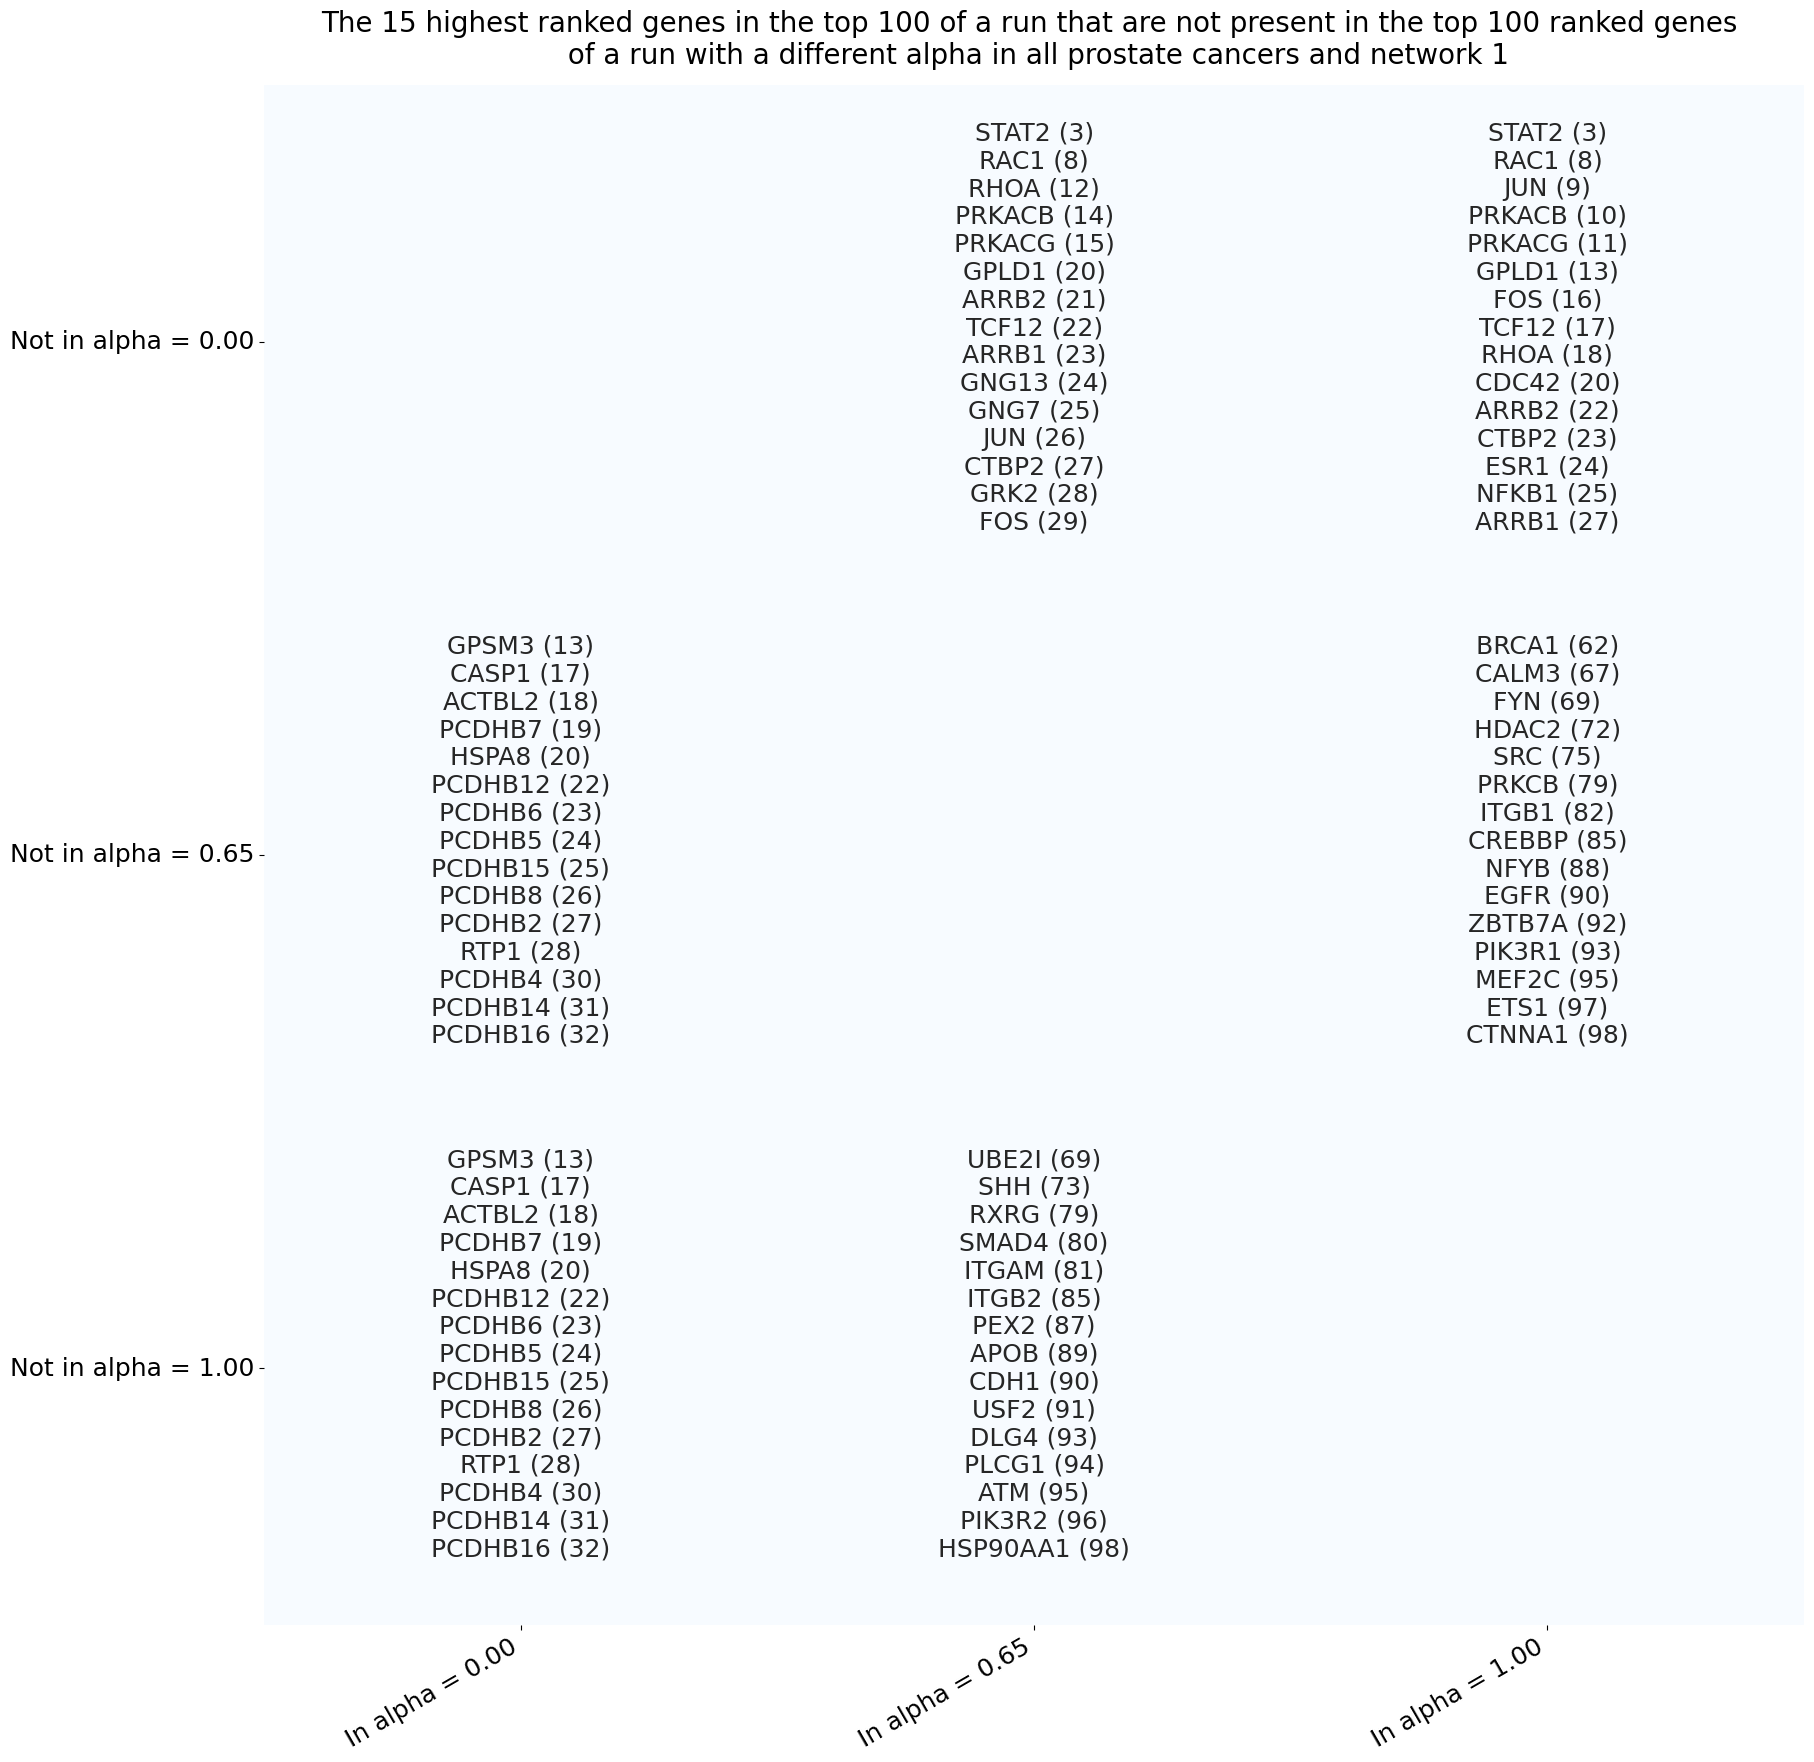

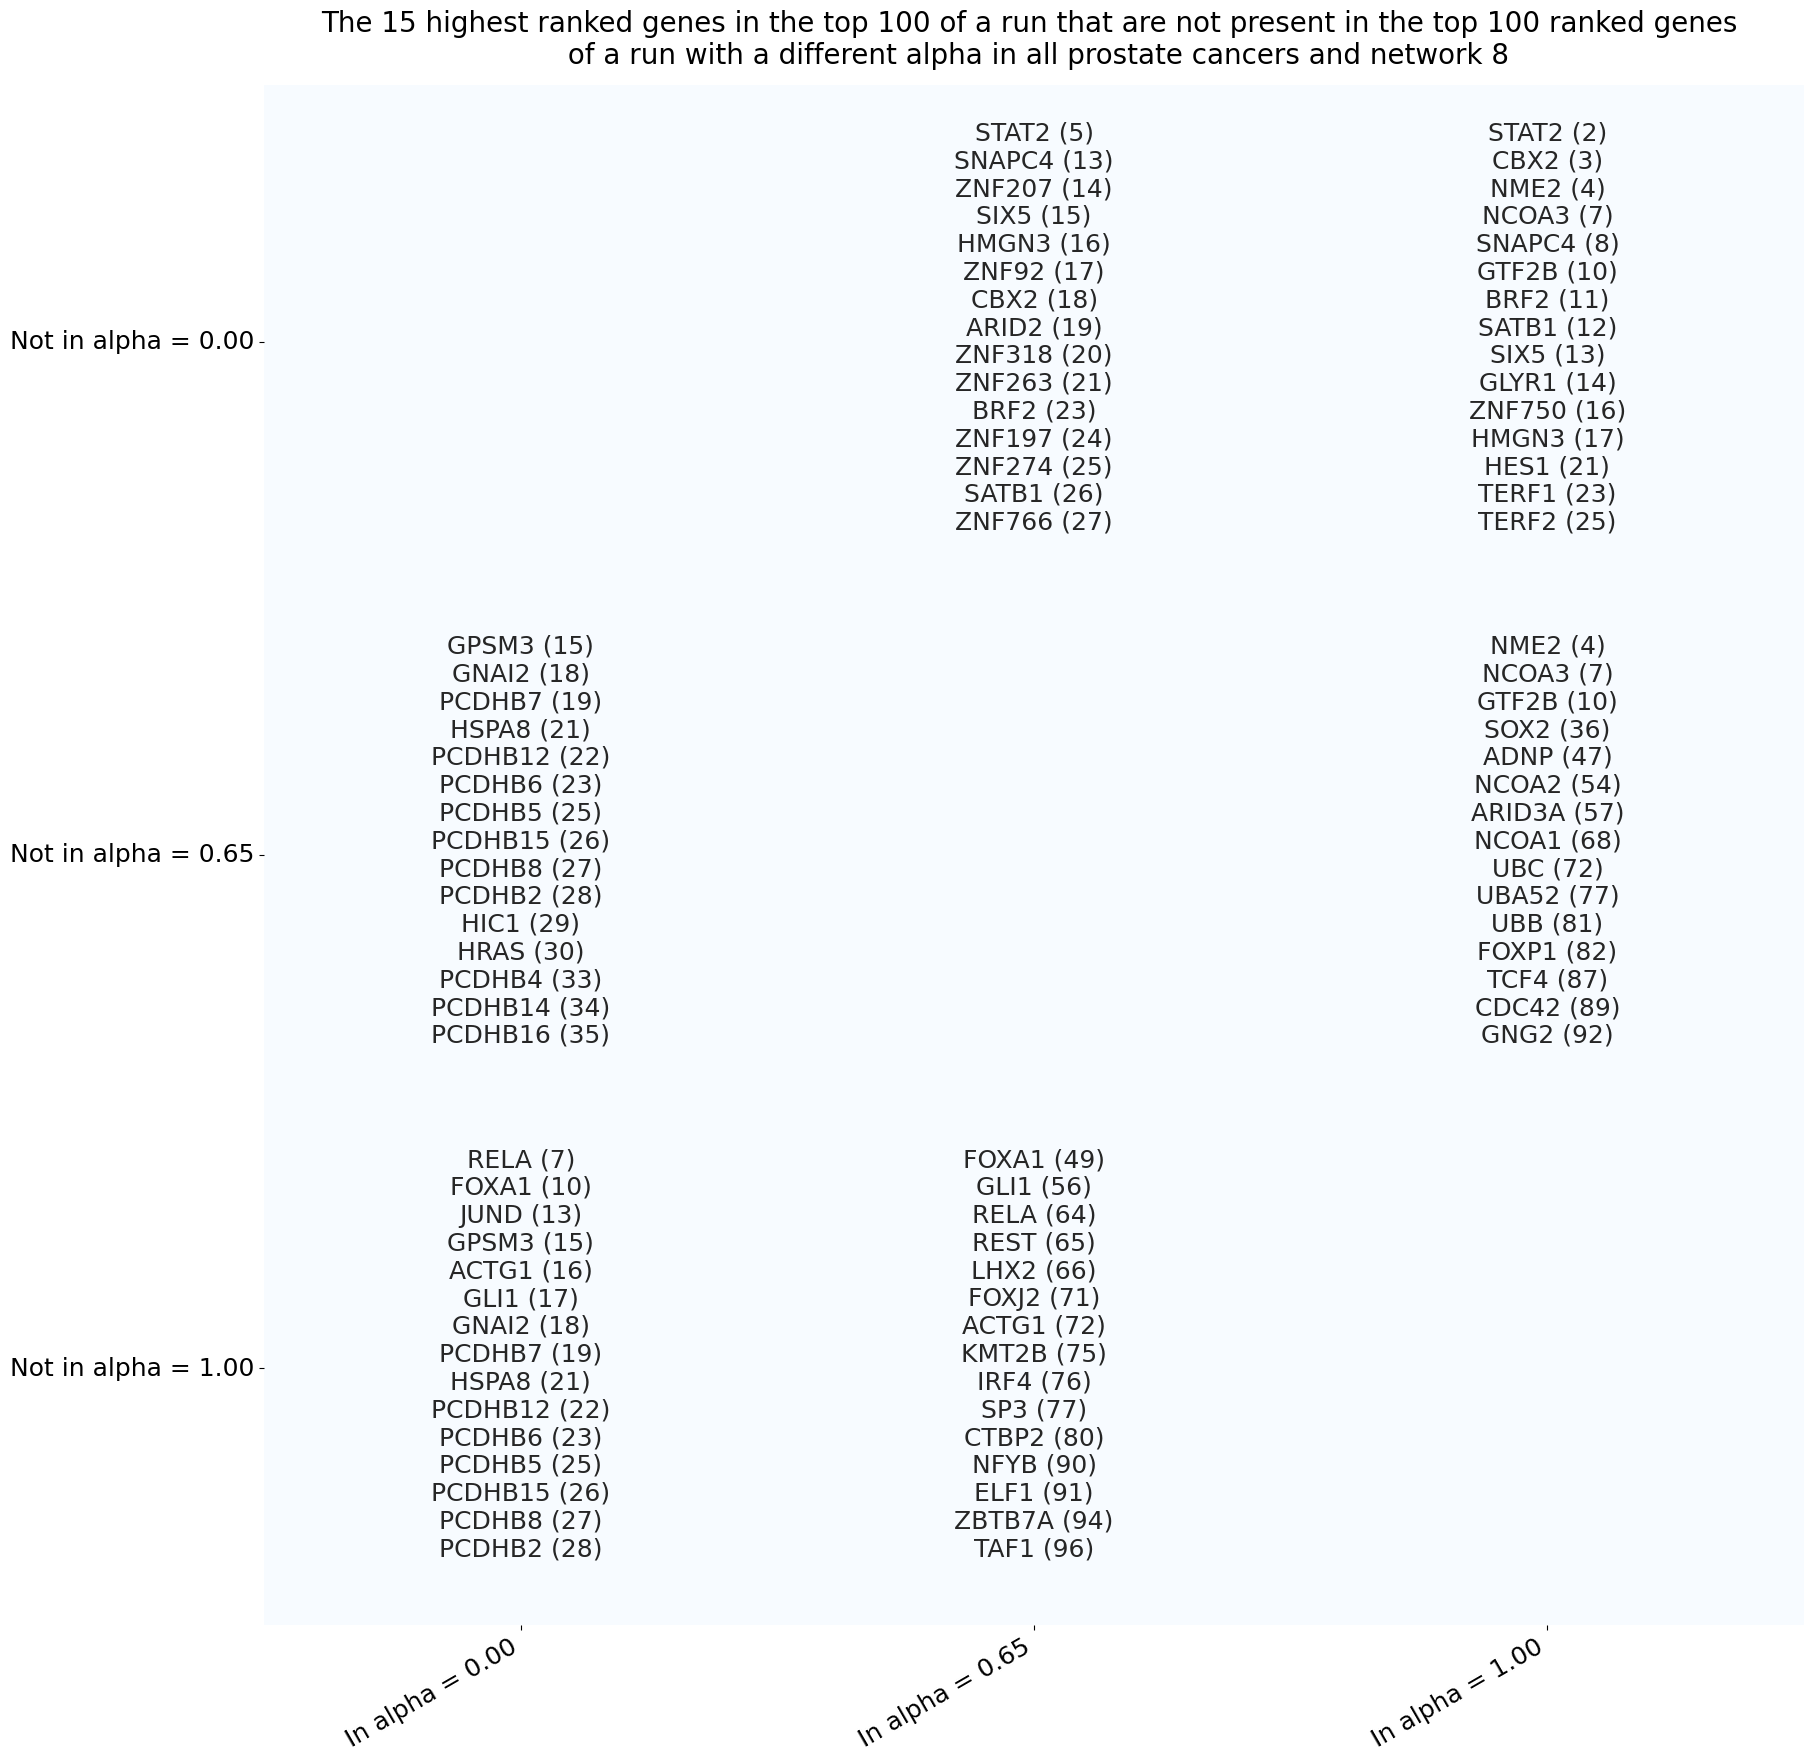

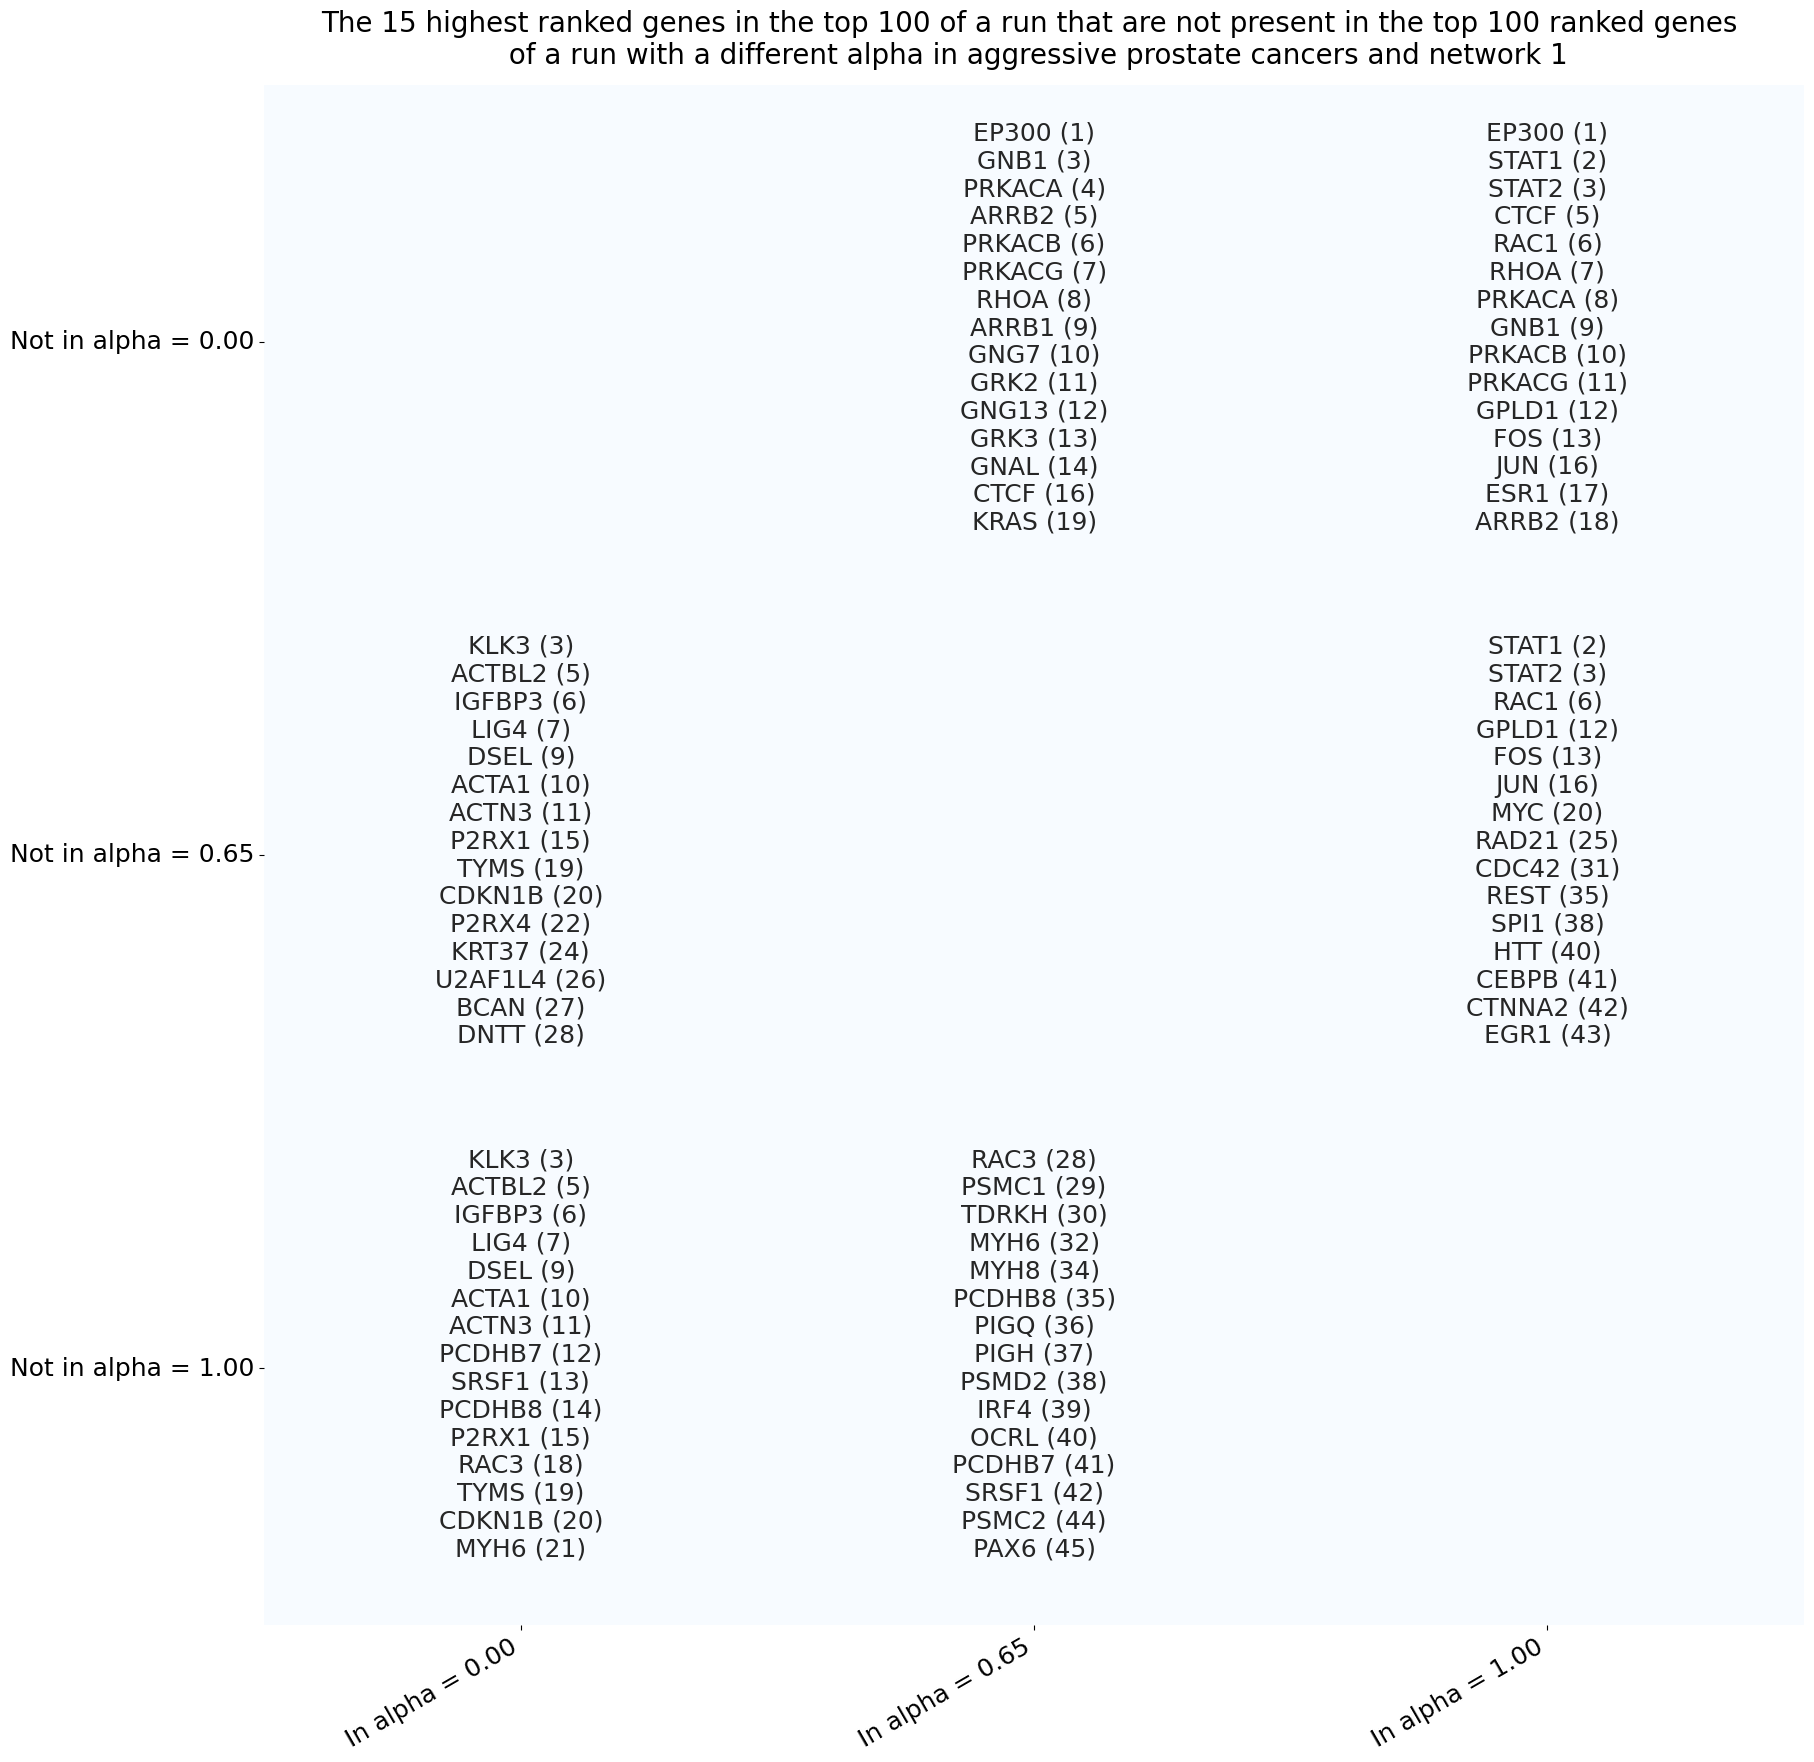

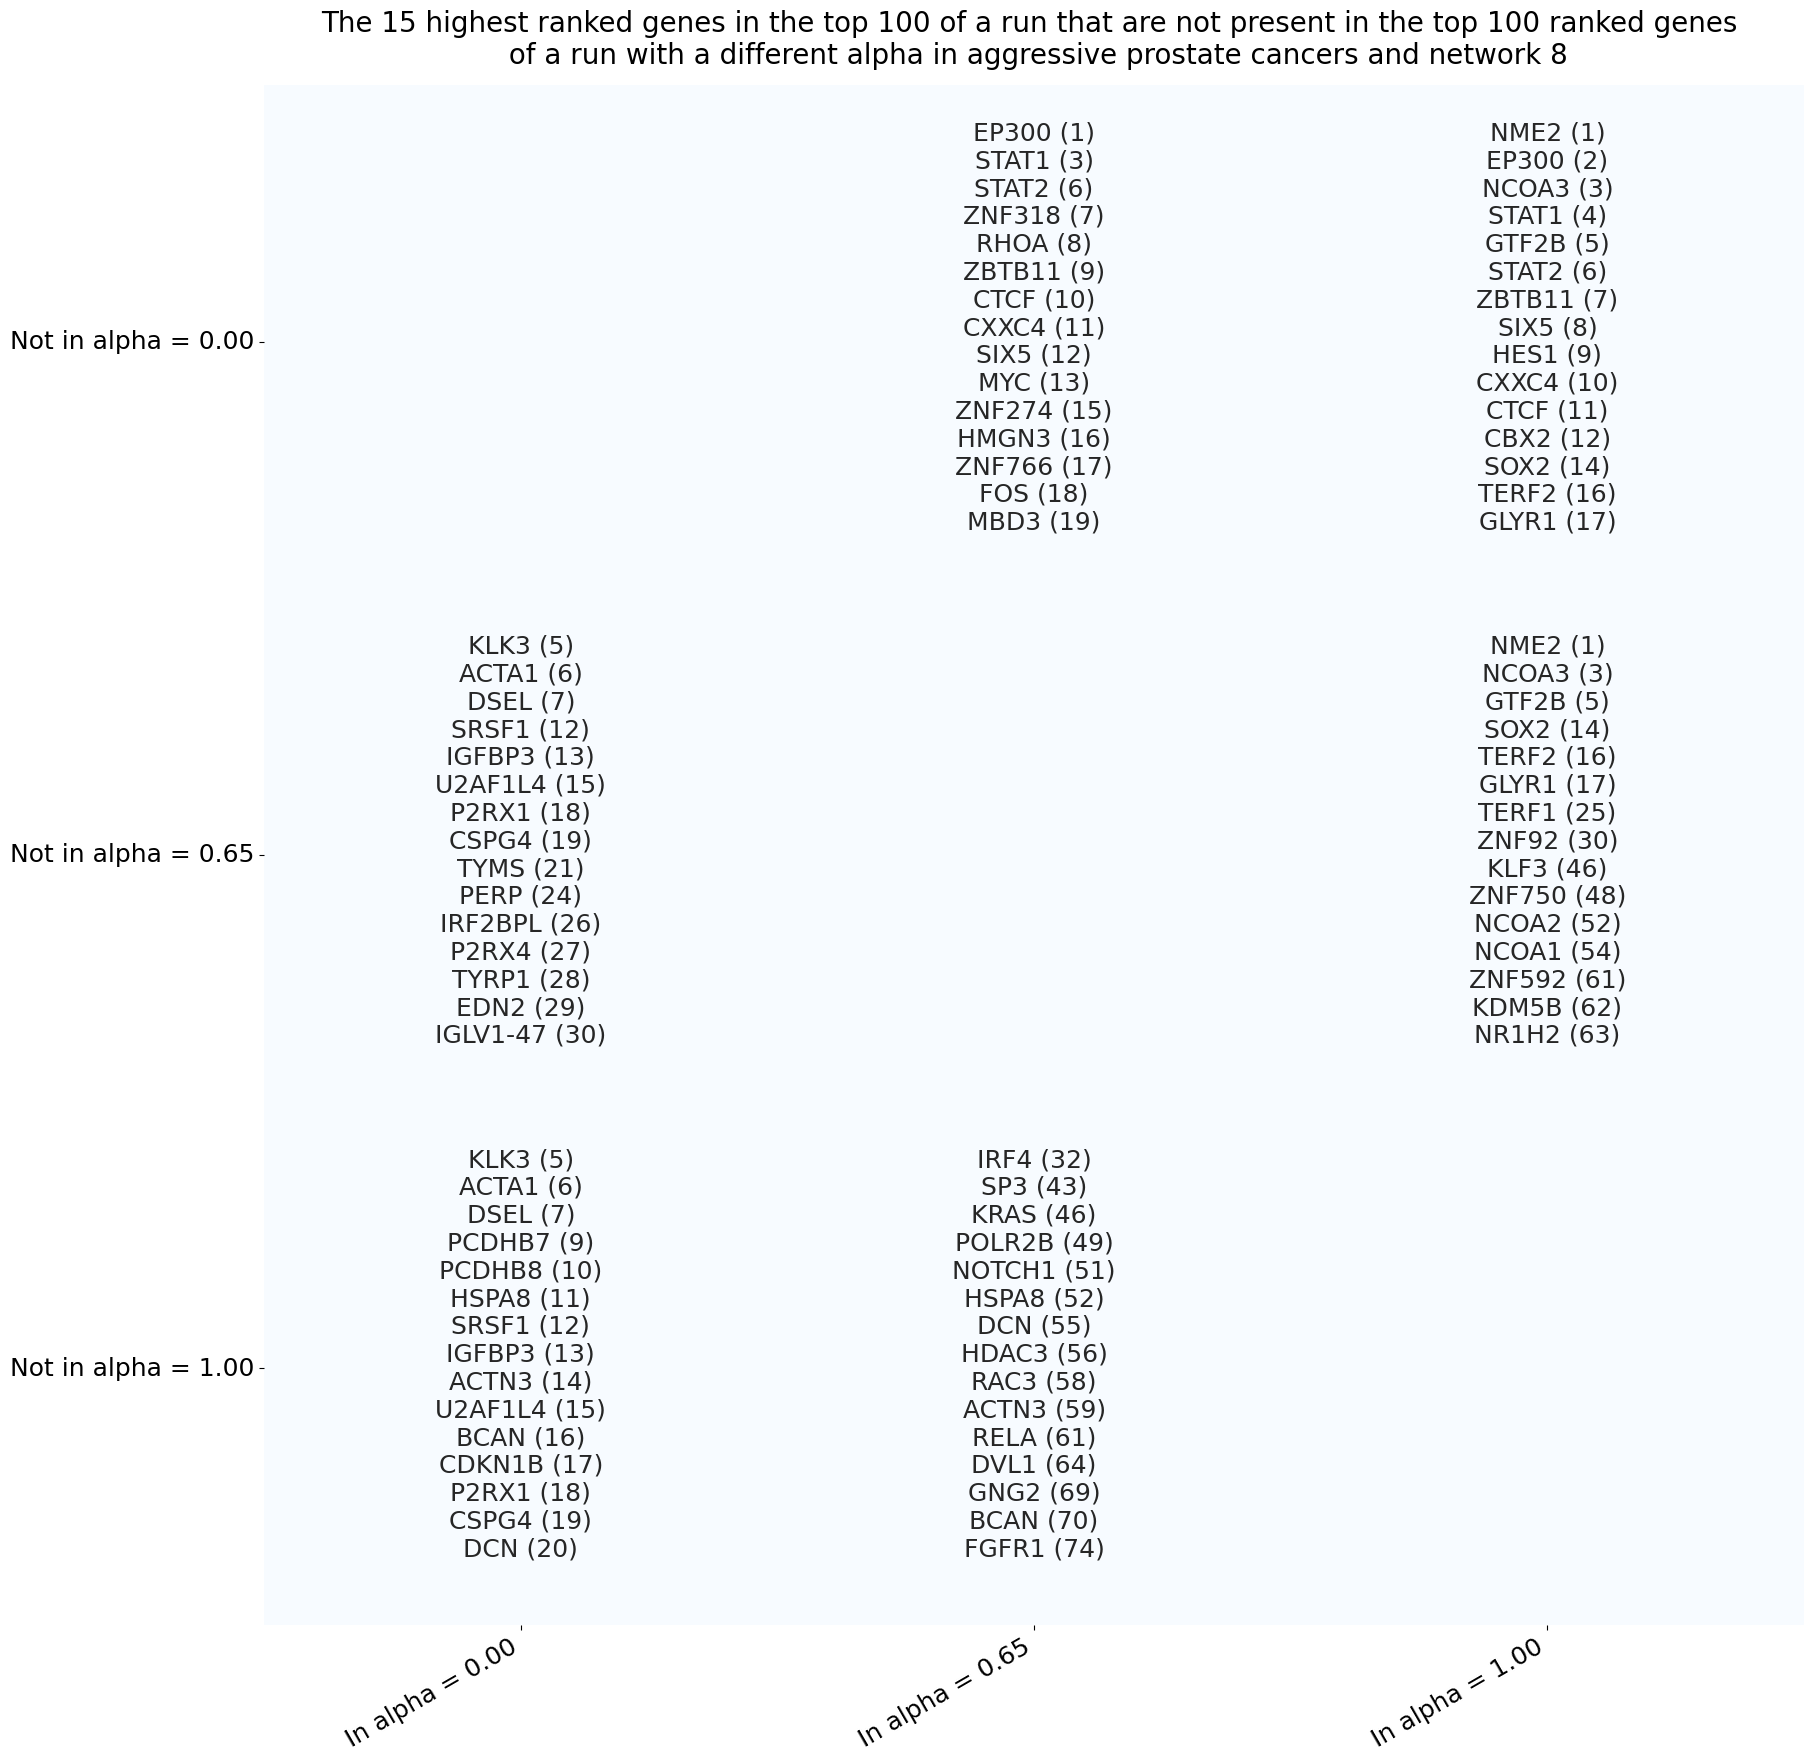

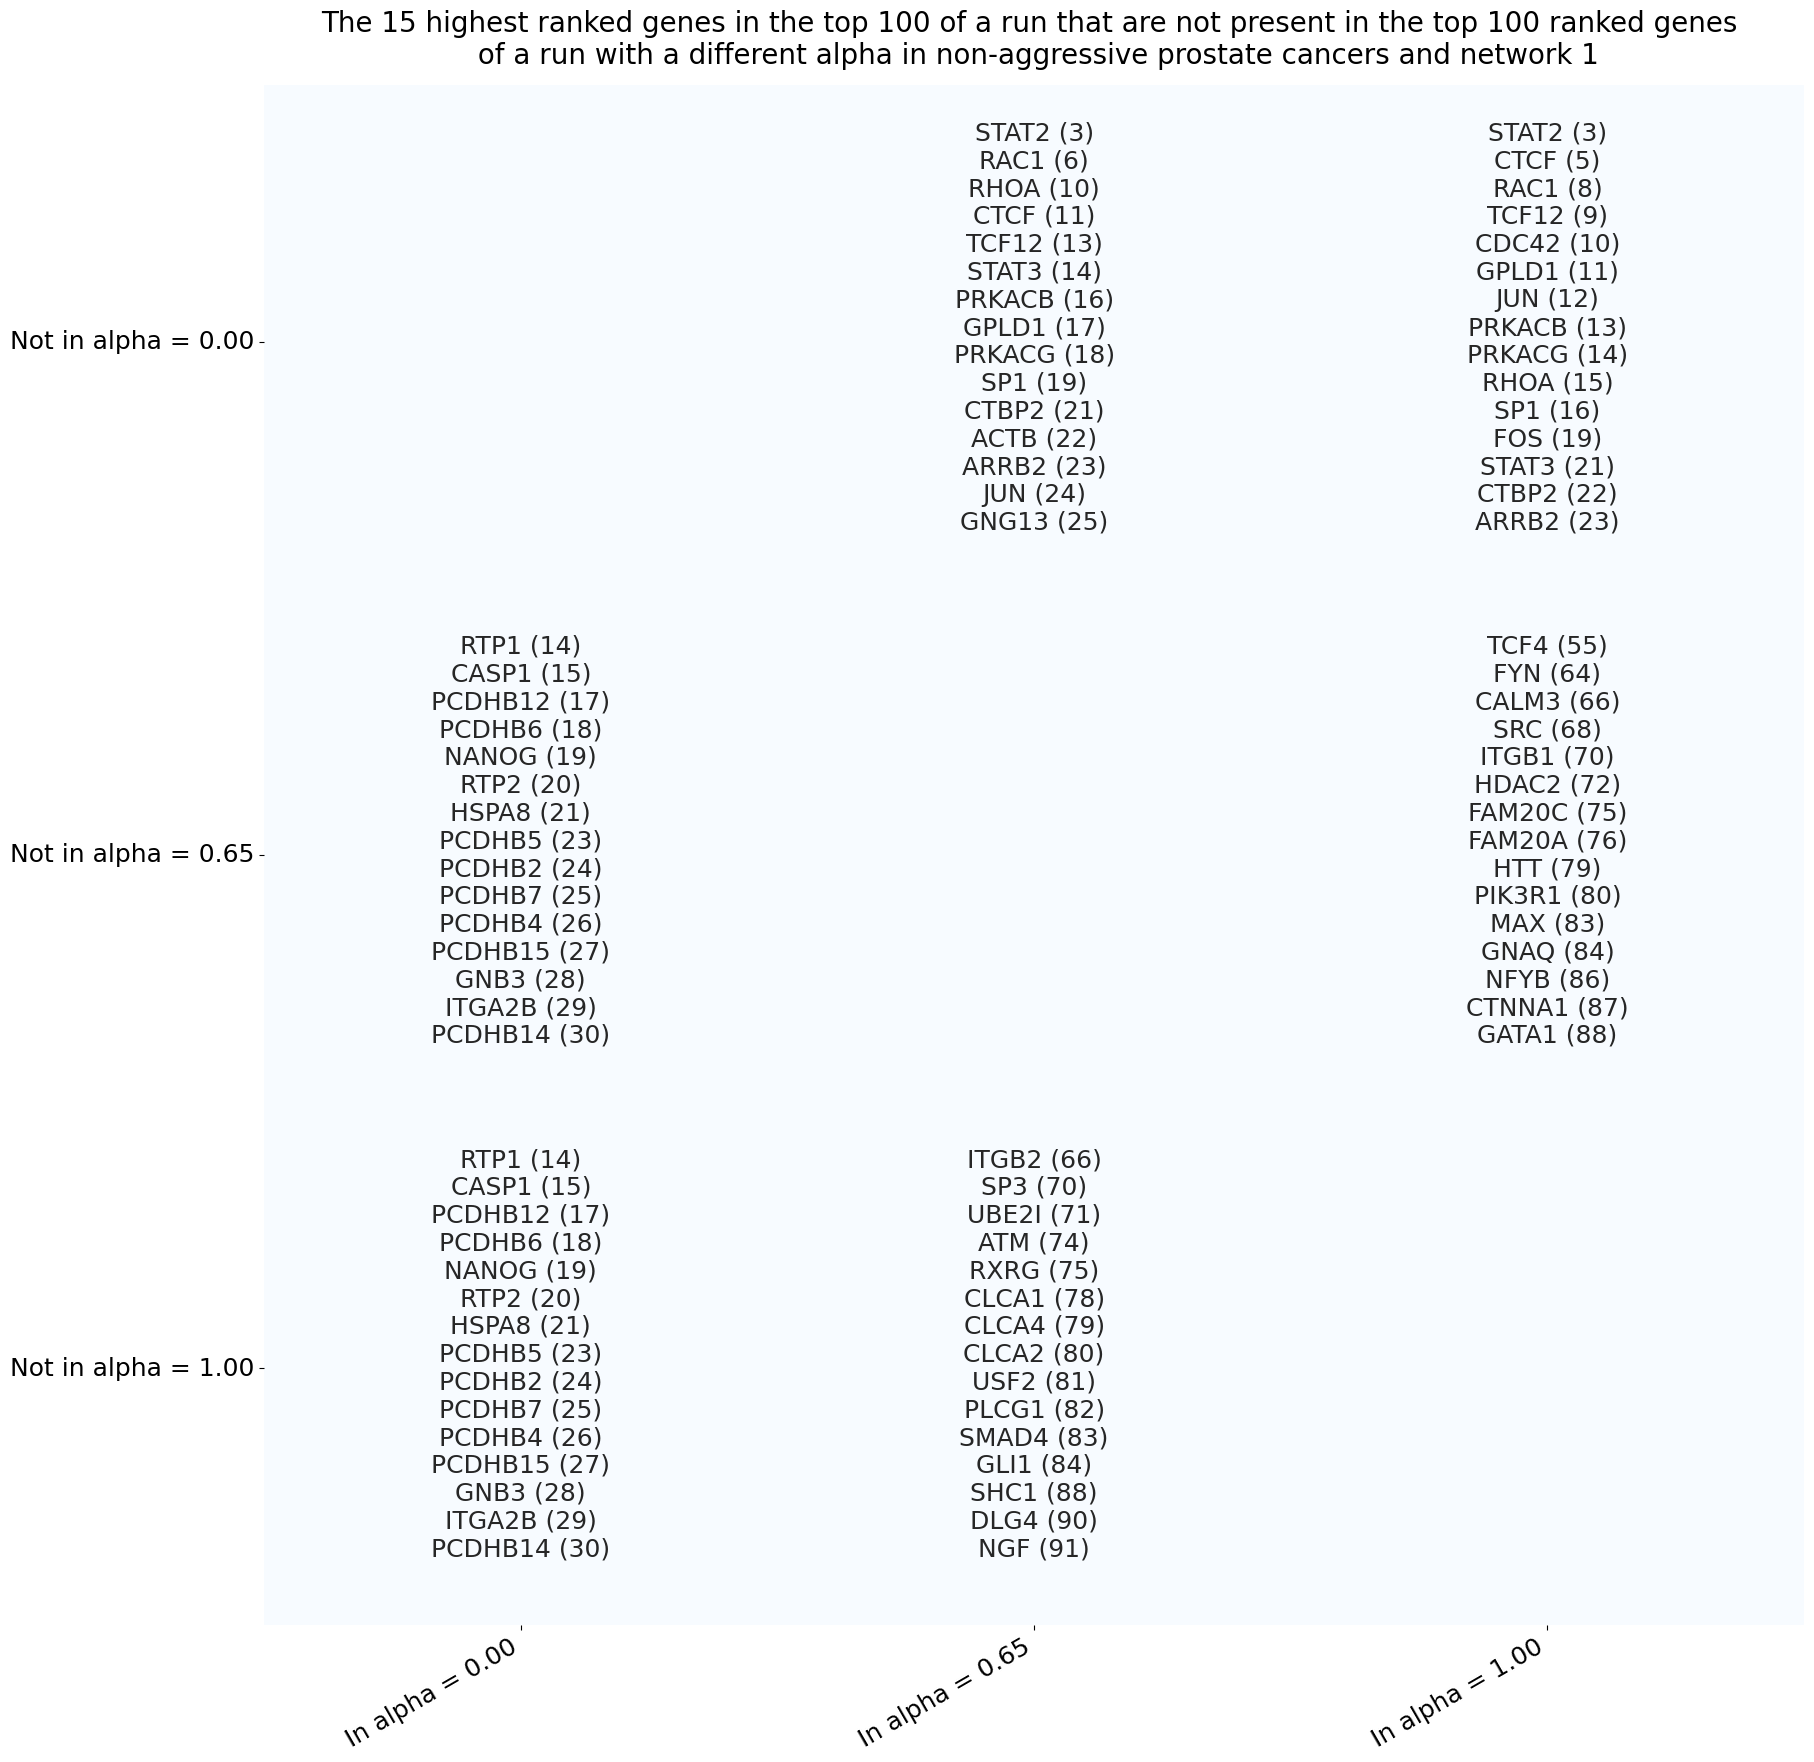

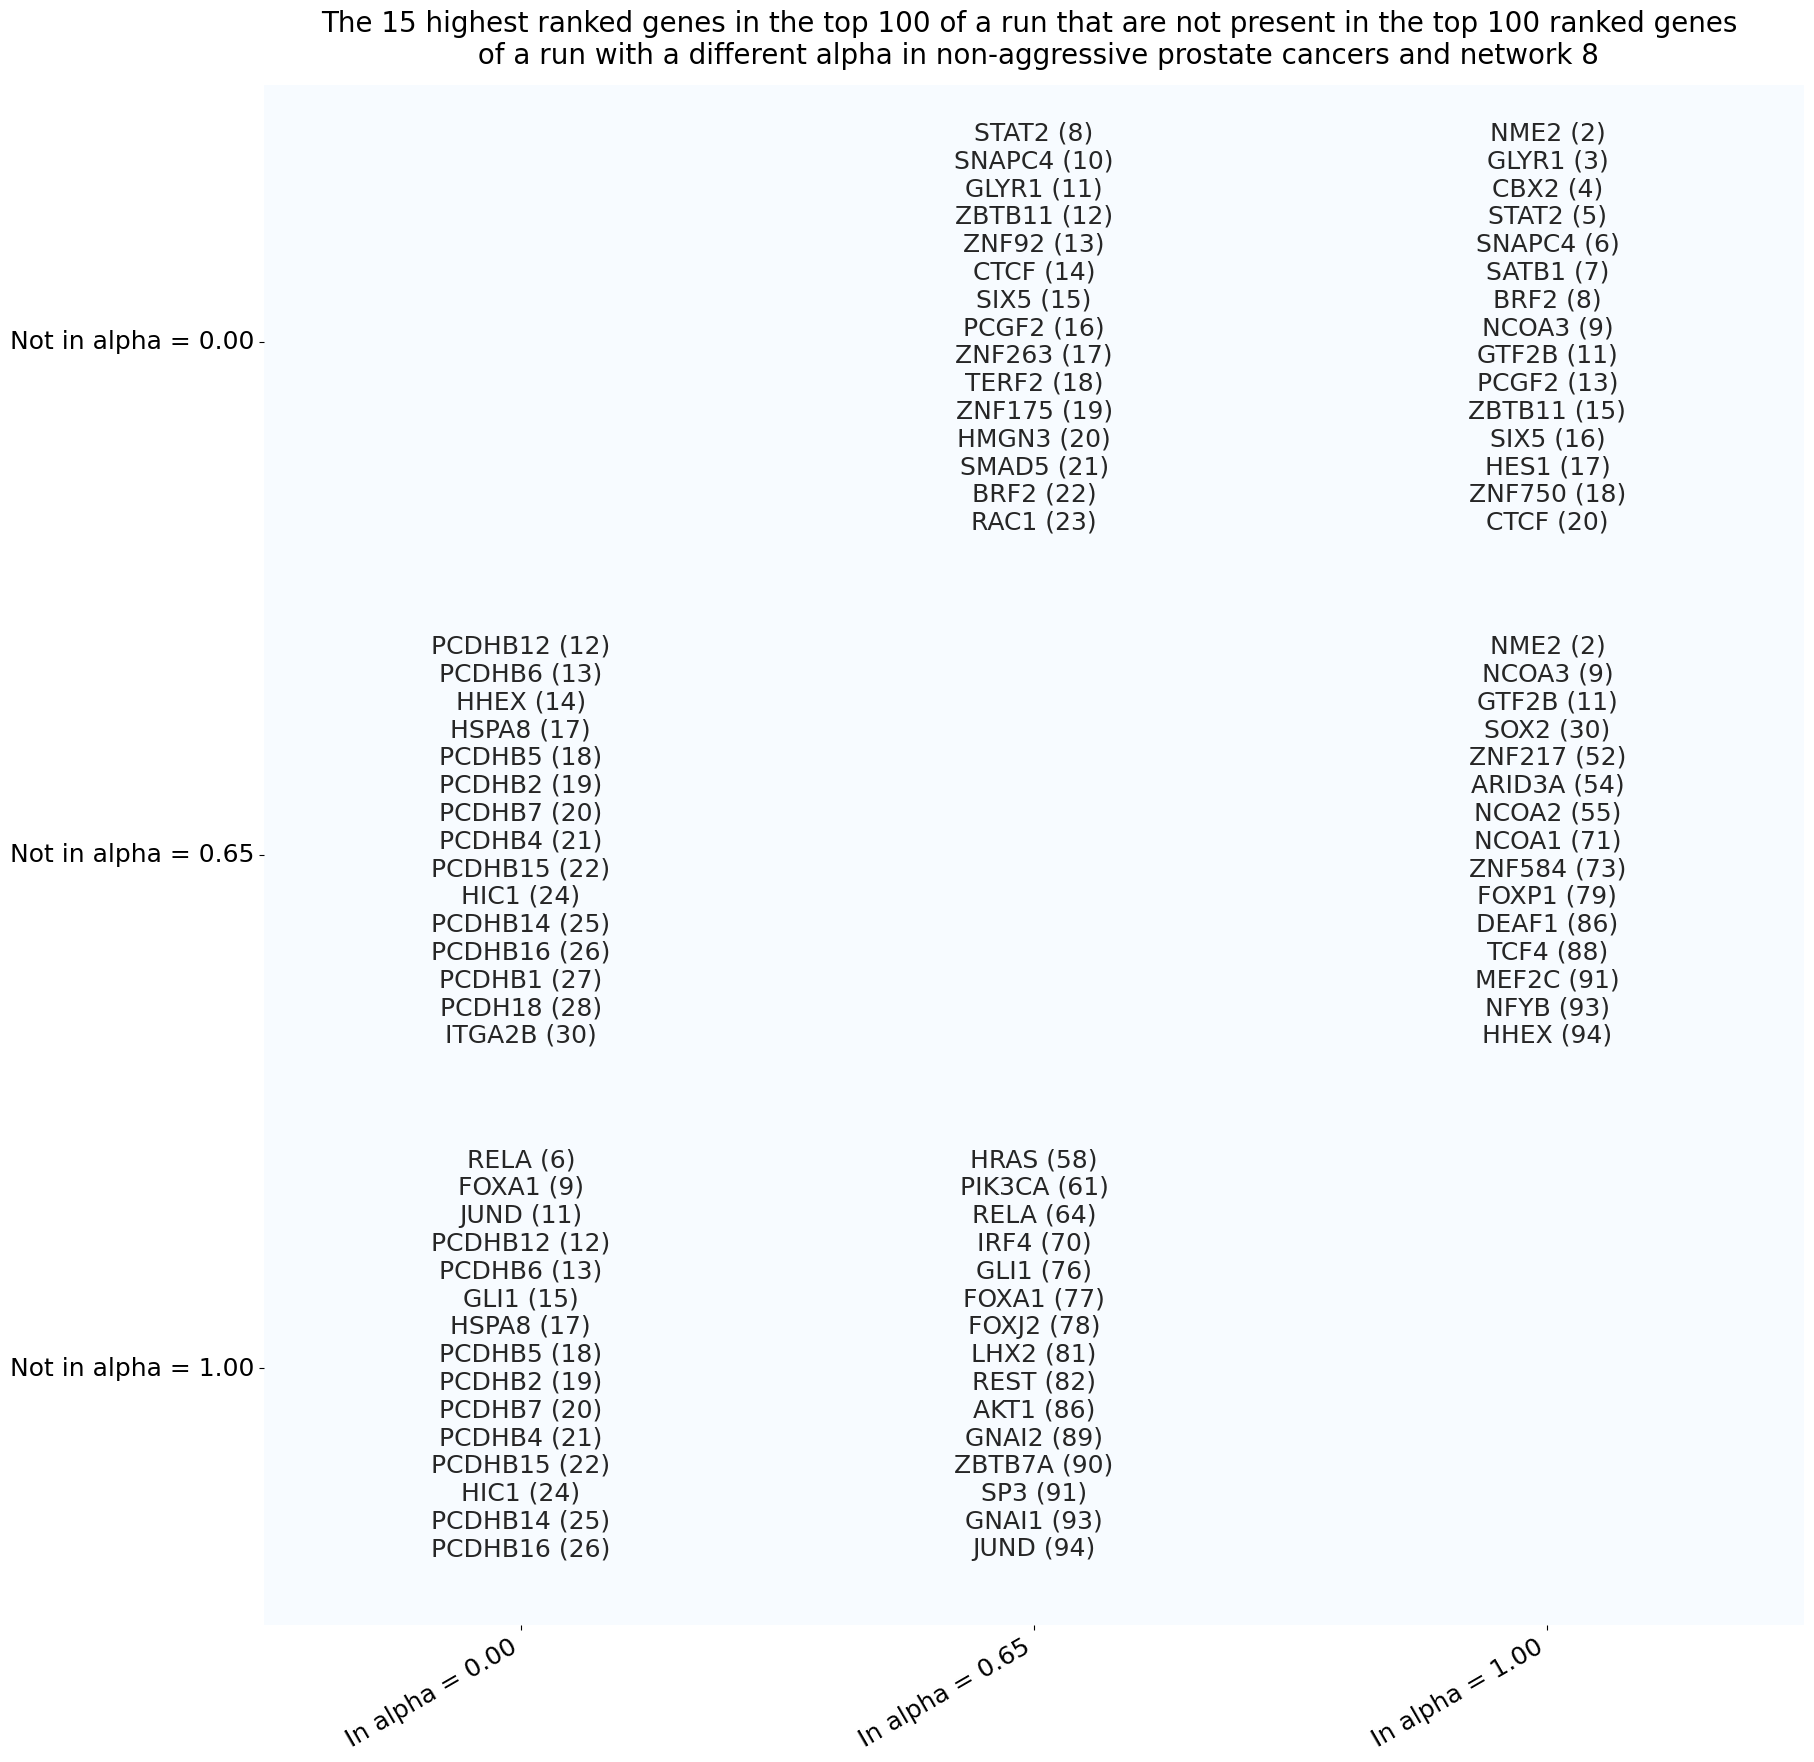

In [28]:
rankings_only_alphas2 = {}
rankings_aggr_only_alphas2 = {}
rankings_non_aggr_only_alphas2 = {}
for i in alphas2:
    rankings_only_alphas2[i] = rankings[i]
    rankings_aggr_only_alphas2[i] = rankings_aggr[i]
    rankings_non_aggr_only_alphas2[i] = rankings_non_aggr[i]

non_overlapping_high_ranked_genes_plot(rankings_only_alphas2,alphas2,'all',1,15)
non_overlapping_high_ranked_genes_plot(rankings_nw8,alphas2,'all',8,15)
non_overlapping_high_ranked_genes_plot(rankings_aggr_only_alphas2,alphas2,'aggressive',1,15)
non_overlapping_high_ranked_genes_plot(rankings_nw8_aggr,alphas2,'aggressive',8,15)
non_overlapping_high_ranked_genes_plot(rankings_non_aggr_only_alphas2,alphas2,'non-aggressive',1,15)
non_overlapping_high_ranked_genes_plot(rankings_nw8_non_aggr,alphas2,'non-aggressive',8,15)

In [5]:
# NO LONGER USED
ranking0 = rankings[0]
ranking1 = rankings[6]
ranking65 = rankings[3]
ranking0top = rankings[0][0:50]
ranking0bot = rankings[0][50:100]
ranking1top = rankings[6][0:50]
ranking1bot = rankings[6][50:100]
ranking65top = rankings[3][0:50]
ranking65bot = rankings[3][50:100]

In [7]:
# NO LONGER USED
def overlap3(l1,l2,l3):
    res = []
    for i in l1:
        if i in l2:
            if i in l3:
                res.append(i)   
    return res

In [8]:
# NO LONGER USED
def overlap3not(l1,l2,l3):
    res = []
    for i in l1:
        if i in l2:
            if i not in l3:
                res.append(i)   
    return res

In [9]:
# NO LONGER USED
def overlap3notnot(l1,l2,l3):
    res = []
    for i in l1:
        if i not in l2:
            if i not in l3:
                res.append(i)     
    return res

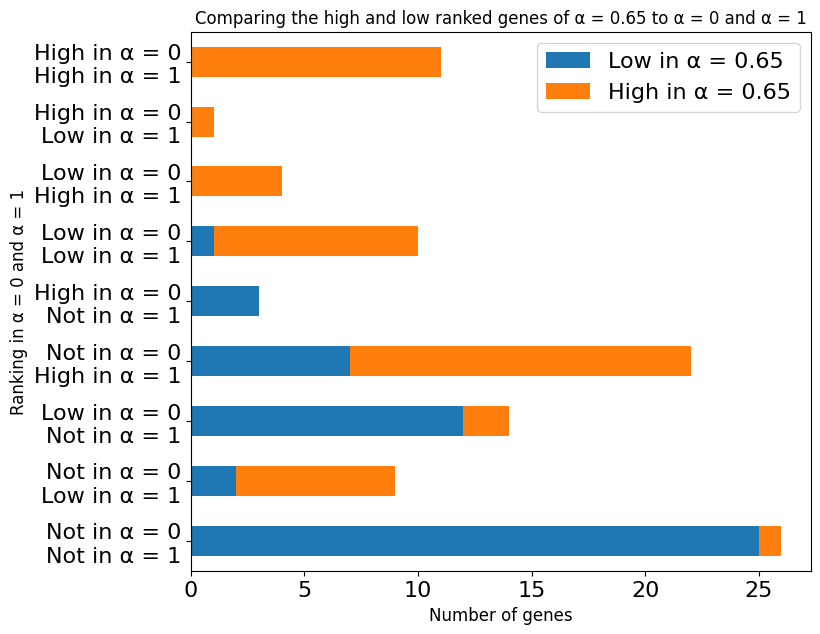

In [10]:
# NO LONGER USED
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

# Data
groups = ['High in \u03B1 = 0\nHigh in \u03B1 = 1', 'High in \u03B1 = 0\nLow in \u03B1 = 1','Low in \u03B1 = 0\nHigh in \u03B1 = 1','Low in \u03B1 = 0\nLow in \u03B1 = 1','High in \u03B1 = 0\nNot in \u03B1 = 1', 'Not in \u03B1 = 0\nHigh in \u03B1 = 1','Low in \u03B1 = 0\nNot in \u03B1 = 1','Not in \u03B1 = 0\nLow in \u03B1 = 1','Not in \u03B1 = 0\nNot in \u03B1 = 1']
values1 = [len(overlap3(ranking65bot,ranking0top,ranking1top)),len(overlap3(ranking65bot,ranking0top,ranking1bot)),len(overlap3(ranking65bot,ranking0bot,ranking1top)),len(overlap3(ranking65bot,ranking0bot,ranking1bot)),len(overlap3not(ranking65bot,ranking0top,ranking1)),len(overlap3not(ranking65bot,ranking1top,ranking0)),len(overlap3not(ranking65bot,ranking0bot,ranking1)),len(overlap3not(ranking65bot,ranking1bot,ranking0)),len(overlap3notnot(ranking65bot,ranking0,ranking1))]
values2 = [len(overlap3(ranking65top,ranking0top,ranking1top)),len(overlap3(ranking65top,ranking0top,ranking1bot)),len(overlap3(ranking65top,ranking0bot,ranking1top)),len(overlap3(ranking65top,ranking0bot,ranking1bot)),len(overlap3not(ranking65top,ranking0top,ranking1)),len(overlap3not(ranking65top,ranking1top,ranking0)),len(overlap3not(ranking65top,ranking0bot,ranking1)),len(overlap3not(ranking65top,ranking1bot,ranking0)),len(overlap3notnot(ranking65top,ranking0,ranking1))]

groups.reverse()
values1.reverse()
values2.reverse()

df = pd.DataFrame({'Low in \u03B1 = 0.65': values1,'High in \u03B1 = 0.65': values2}, index=groups)

ax = df.plot.barh(figsize =(8,7), stacked=True)

plt.xlabel('Number of genes',size=12)
plt.ylabel('Ranking in \u03B1 = 0 and \u03B1 = 1',size=12)
plt.title('Comparing the high and low ranked genes of \u03B1 = 0.65 to \u03B1 = 0 and \u03B1 = 1', size = 12)
plt.savefig('high_and_low_rankings_compared.png',bbox_inches="tight")